<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
[[1.         0.65174393 1.         1.        ]
 [0.98335946 0.76197173 0.94089337 0.99735461]
 [0.92798459 0.37957895 0.8646636  0.99317808]
 [0.87313643 0.51299839 0.81223513 0.94729239]
 [0.85943772 0.30532804 0.77613557 0.85317138]
 [0.797566   0.3694479  0.76912588 0.80138177]
 [0.81412828 0.73016111 0.27071031 0.79649041]
 [0.7880179  0.71745725 0.68649342 0.79440736]
 [0.72901786 0.74173276 0.66049977 0.77446805]
 [0.74590551 0.43692884 0.64644319 0.7606613 ]
 [0.61635061 0.45150637 0.48573267 0.74017475]
 [0.608

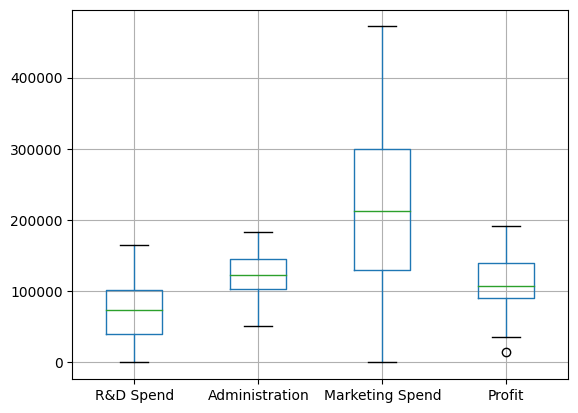

In [2]:
"""Import Libraries"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

"""Reading Data"""

df=pd.read_csv('50_Startups.csv')

df.info()

df.boxplot()

"""Dropping non Contributing Features"""

X=df.drop('State', axis=1)
X

"""Preprocessing The whole dataset
*   Use Minmax Scaler
"""

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)
print(X)

"""Data Split"""

y = df['Profit']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

"""Model Fitting and Pipelining"""

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

"""Predicting and Evaluation"""

y_pred = regressor.predict(X_test)

#R2_score
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

#RMSE
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test,y_pred)))

#MSE
print(mean_squared_error(y_test,y_pred))